# Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline 

sns.set(style="ticks")

In [2]:
data = pd.read_csv('data/laptops_train.csv', sep=",")

In [3]:
data.shape

(977, 13)

In [4]:
data.dtypes

Manufacturer                 object
Model Name                   object
Category                     object
Screen Size                  object
Screen                       object
CPU                          object
RAM                          object
 Storage                     object
GPU                          object
Operating System             object
Operating System Version     object
Weight                       object
Price                       float64
dtype: object

In [5]:
data.isnull().sum()

Manufacturer                  0
Model Name                    0
Category                      0
Screen Size                   0
Screen                        0
CPU                           0
RAM                           0
 Storage                      0
GPU                           0
Operating System              0
Operating System Version    136
Weight                        0
Price                         0
dtype: int64

In [6]:
data.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20


In [7]:
total_count = data.shape[0]

print('Всего строк: {}'.format(total_count))

Всего строк: 977


## Обработка пропусков в данных

In [8]:
dataWithoutNull = data.dropna(axis=1, how='any')

(data.shape, dataWithoutNull.shape)

((977, 13), (977, 12))

In [9]:
data = dataWithoutNull.dropna(axis=0, how='any')

(data.shape)

(977, 12)

In [10]:
data.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,16037611.20


In [11]:
num_cols = []

for col in data.columns:
    temp_null_count = data[data[col].isnull()].shape[0]
    
    dt = str(data[col].dtype)
    
    if temp_null_count > 0:
        num_cols.append(col)
        
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))
    else:
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, 0))

Колонка Manufacturer. Тип данных object. Количество пустых значений 0, 0%.
Колонка Model Name. Тип данных object. Количество пустых значений 0, 0%.
Колонка Category. Тип данных object. Количество пустых значений 0, 0%.
Колонка Screen Size. Тип данных object. Количество пустых значений 0, 0%.
Колонка Screen. Тип данных object. Количество пустых значений 0, 0%.
Колонка CPU. Тип данных object. Количество пустых значений 0, 0%.
Колонка RAM. Тип данных object. Количество пустых значений 0, 0%.
Колонка  Storage. Тип данных object. Количество пустых значений 0, 0%.
Колонка GPU. Тип данных object. Количество пустых значений 0, 0%.
Колонка Operating System. Тип данных object. Количество пустых значений 0, 0%.
Колонка Weight. Тип данных object. Количество пустых значений 0, 0%.
Колонка Price. Тип данных float64. Количество пустых значений 0, 0%.


In [12]:
cat_cols = []

for col in data.columns:
    temp_null_count = data[data[col].isnull()].shape[0]
    
    dt = str(data[col].dtype)
    
    if temp_null_count > 0 and (dt == 'object'):
        cat_cols.append(col)
        
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))
    else:
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, 0))

Колонка Manufacturer. Тип данных object. Количество пустых значений 0, 0%.
Колонка Model Name. Тип данных object. Количество пустых значений 0, 0%.
Колонка Category. Тип данных object. Количество пустых значений 0, 0%.
Колонка Screen Size. Тип данных object. Количество пустых значений 0, 0%.
Колонка Screen. Тип данных object. Количество пустых значений 0, 0%.
Колонка CPU. Тип данных object. Количество пустых значений 0, 0%.
Колонка RAM. Тип данных object. Количество пустых значений 0, 0%.
Колонка  Storage. Тип данных object. Количество пустых значений 0, 0%.
Колонка GPU. Тип данных object. Количество пустых значений 0, 0%.
Колонка Operating System. Тип данных object. Количество пустых значений 0, 0%.
Колонка Weight. Тип данных object. Количество пустых значений 0, 0%.
Колонка Price. Тип данных float64. Количество пустых значений 0, 0%.


## Преобразование категориальных признаков в числовые

In [55]:
cat_enc = pd.DataFrame({ 'c1': data.T[0] })

cat_enc = cat_enc.astype(str)

In [56]:
cat_enc['c1'].unique()

array(['Apple', 'MacBook Pro', 'Ultrabook', '13.3"',
       'IPS Panel Retina Display 2560x1600', 'Intel Core i5 2.3GHz',
       '8GB', '128GB SSD', 'Intel Iris Plus Graphics 640', 'macOS',
       '1.37kg', '11912523.48'], dtype=object)

## Кодирование категориальных признаков

In [57]:
from sklearn.preprocessing import LabelEncoder

In [58]:
le = LabelEncoder()

cat_enc_le = le.fit_transform(cat_enc['c1'])

In [63]:
le.classes_

array(['1.37kg', '11912523.48', '128GB SSD', '13.3"', '8GB', 'Apple',
       'IPS Panel Retina Display 2560x1600', 'Intel Core i5 2.3GHz',
       'Intel Iris Plus Graphics 640', 'MacBook Pro', 'Ultrabook',
       'macOS'], dtype=object)

In [64]:
cat_enc_le

array([ 5,  9, 10,  3,  6,  7,  4,  2,  8, 11,  0,  1])

In [65]:
np.unique(cat_enc_le)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [66]:
# Перед кодированием уникальные значения признака сортируются в лексикографическом порядке

le.inverse_transform([0, 1, 2, 3])

array(['1.37kg', '11912523.48', '128GB SSD', '13.3"'], dtype=object)

## Масштабирование данных

In [74]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [75]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['Price']])

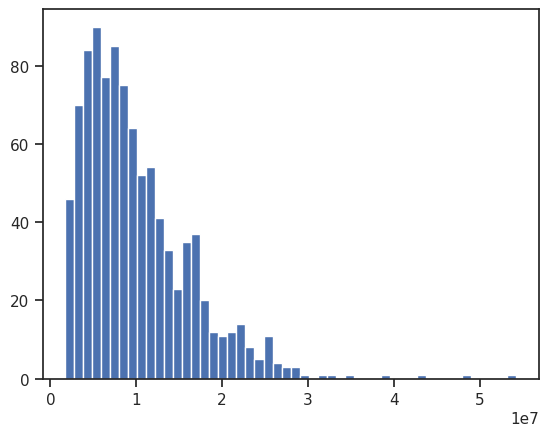

In [76]:
plt.hist(data['Price'], 50)
plt.show()

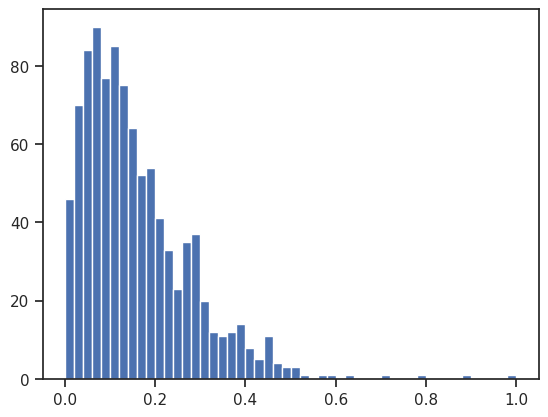

In [77]:
plt.hist(sc1_data, 50)
plt.show()